In [3]:
# All tickets for Sponsor 19
csv_path='/Users/gaba/Code/torproject/trac/datasets/S19_tickets.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)

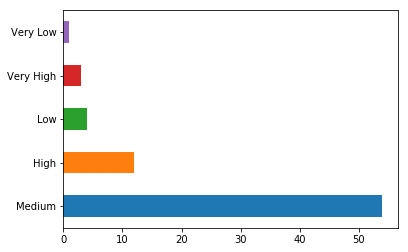

In [4]:
# how is the priority on tickets
csv_file['Priority'].value_counts().plot.barh()

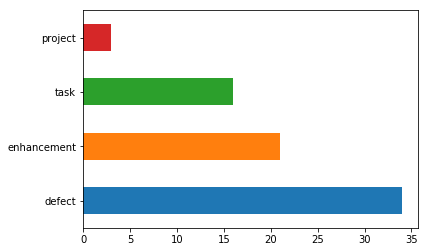

In [5]:
# which type of tickets
csv_file['Type'].value_counts().plot.barh()

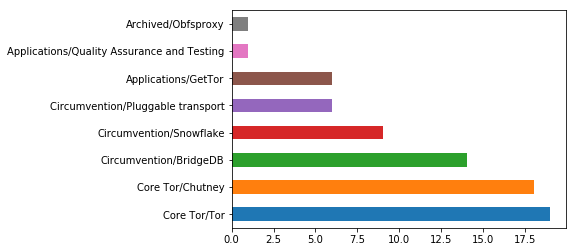

In [6]:

# which components we are changing
csv_file['Component'].value_counts().plot.barh()

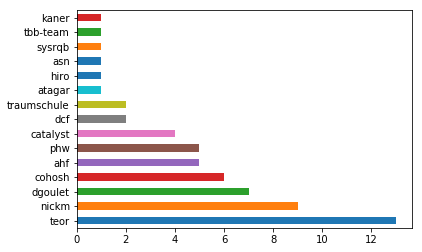

In [8]:
# who is assigned (this may not mean more than the people with more tickets are more consistent on assigning themselves tickets)
csv_file['Owner'].value_counts().plot.barh()


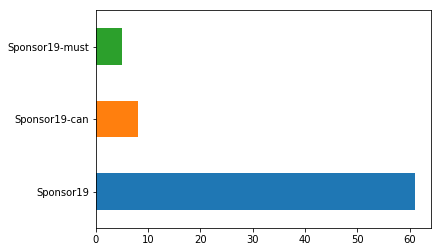

In [9]:
# how many must tickets versus 'can be done'
csv_file['Sponsor'].value_counts().plot.barh()

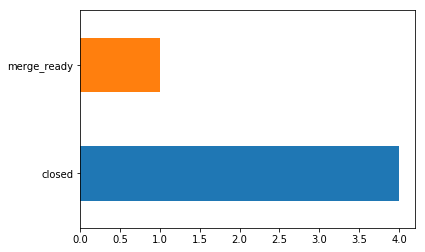

In [10]:
# how many sponsor19-must tickets are already done and how many still need to be finish
csv_file.query('Sponsor=="Sponsor19-must"')['Status'].value_counts().plot.barh()


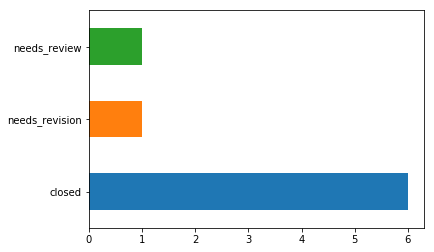

In [11]:
# what about the 'could be done' tickets
csv_file.query('Sponsor=="Sponsor19-can"')['Status'].value_counts().plot.barh()

In [12]:
# are all of the open tickets estimated?
csv_file[csv_file.Points.isnull()].query('Status!="closed"')

,id,Summary,Sponsor,Status,Owner,Type,Priority,Milestone,Component,Severity,Resolution,Modified,Actual Points,Parent ID,Points,Reviewer,Reporter,Keywords
8,29136,PT_LOG and PT_STATUS event fields unspecifed,Sponsor19-can,needs_revision,atagar,defect,High,Tor: 0.4.0.x-final,Core Tor/Tor,Normal,NaN,16 may. 2019 15:23:07,NaN,NaN,NaN,ahf,atagar,"tor-spec, tor-pt, 040-must documentation"
29,25899,Only run retry_dns() and check_dns_honesty() o...,Sponsor19,needs_revision,dgoulet,enhancement,Medium,Tor: unspecified,Core Tor/Tor,Normal,NaN,20 feb. 2019 16:05:17,NaN,#25500,NaN,NaN,nickm,"034-roadmap-subtask, 035-removed-20180711, 040..."
56,29875,Going from obfs4 to snowflake using the Tor Ne...,Sponsor19-must,merge_ready,nickm,defect,Medium,Tor: 0.4.0.x-final,Core Tor/Tor,Normal,NaN,5 jun. 2019 13:14:54,0.5,NaN,NaN,ahf,cypherpunks,"tbb-needs, 035-backport, 040-backport, network..."
58,29976,rework bootstrap reporting to use pubsub,Sponsor19,merge_ready,catalyst,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,Normal,NaN,29 may. 2019 13:51:38,5.0,NaN,NaN,nickm,catalyst,bootstrap network-team-roadmap-2019-Q1Q2
68,30459,Let chutney tell Tor whether a network is supp...,Sponsor19,needs_review,nickm,defect,Medium,Tor: 0.4.2.x-final,Core Tor/Chutney,Normal,NaN,30 may. 2019 16:49:53,1.0,#29024,NaN,NaN,nickm,"tor-pt, 041-accepted-20190115, network-team-ro..."


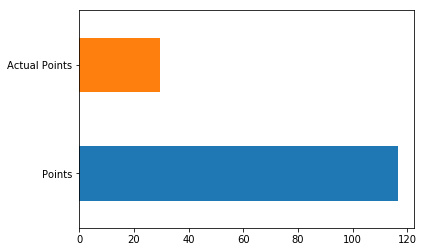

In [14]:
# How many days took to complete the ticket versus estimation (there may not be enough data on actual points for this)
csv_file.query('Status=="closed"').filter(['Points', 'Actual Points']).sum().plot.barh()

In [16]:
# which ones were the big tickets?
csv_file.query('Status=="closed"').query('Points>6')

,id,Summary,Sponsor,Status,Owner,Type,Priority,Milestone,Component,Severity,Resolution,Modified,Actual Points,Parent ID,Points,Reviewer,Reporter,Keywords
17,15522,Write Protobufs for any BridgeDB data which mu...,Sponsor19,closed,NaN,enhancement,Medium,NaN,Circumvention/BridgeDB,Normal,wontfix,28 ene. 2019 15:11:34,NaN,NaN,13.0,NaN,isis,"bridgedb-db, metrics, protobuf"
24,22776,Implement the remaining cryptographic protocol...,Sponsor19-can,closed,NaN,enhancement,Medium,NaN,Circumvention/BridgeDB,Normal,wontfix,30 ene. 2019 14:23:44,NaN,#22775,21.0,NaN,isis,"bridgedb-distributors, rust"
34,28179,Handle output from PT processes with the event...,Sponsor19-must,closed,ahf,enhancement,Medium,Tor: 0.4.0.x-final,Core Tor/Tor,Normal,implemented,17 ene. 2019 16:18:09,NaN,#25502,31.0,nickm,ahf,"tor-pt, 040-roadmap-subtask"
40,28848,Document Snowflake broker implementation,Sponsor19,closed,ahf,project,Medium,NaN,Circumvention/Snowflake,Normal,implemented,28 feb. 2019 19:34:38,3.0,NaN,8.0,"cohosh, arma",ahf,"snowflake, tor-pt, network-team-roadmap-2019-Q1Q2"
